In [1]:
include("OutputHandling.jl")
include("ConcentrationClassification.jl")

classifyConcentrations

The getAllCSVs was called on my maybeOscValues csv, which includes all of the combinations of rate constants that had at least one oscillatory solution.

In [19]:
potentialPs = getAllUniqueP(getAllCSVs())

93×13 Matrix{Float64}:
 0.01       0.001       0.149     0.0007  …  6.30957  160.773   85.3  10000.0
 0.01       0.00316228  0.146838  0.0007     6.30957  160.773   85.3  10000.0
 0.01       0.0316228   0.118377  0.0007     6.30957  160.773   85.3  10000.0
 0.0316228  0.0316228   0.442719  0.0007     6.30957  160.773   85.3  10000.0
 0.0316228  0.1         0.374342  0.0007     6.30957  160.773   85.3  10000.0
 0.1        0.001       1.499     0.0007  …  6.30957  160.773   85.3  10000.0
 0.1        0.00316228  1.49684   0.0007     6.30957  160.773   85.3  10000.0
 0.1        0.01        1.49      0.0007     6.30957  160.773   85.3  10000.0
 0.1        0.316228    1.18377   0.0007     6.30957  160.773   85.3  10000.0
 0.1        0.00316228  1.49684   0.0007     6.30957  160.773   85.3  10000.0
 ⋮                                        ⋱             ⋮             
 0.1        1.0         0.5       0.0007     3.98107   69.9618  85.3  10000.0
 0.316228   3.16228     1.58114   0.0007  …  3.9

In [4]:
mkdir("MaybeOscValuesAnalysis")

"MaybeOscValuesAnalysis"

In [4]:
cd("MaybeOscValuesAnalysis")

In [60]:
u0Ranges = getu0Ranges()

Dict{Any, Any} with 4 entries:
  :P => [0.001, 0.00158489, 0.00251189, 0.00398107, 0.00630957, 0.01, 0.0158489…
  :A => [0.01, 0.0158489, 0.0251189, 0.0398107, 0.0630957, 0.1, 0.158489, 0.251…
  :K => [0.001, 0.00158489, 0.00251189, 0.00398107, 0.00630957, 0.01, 0.0158489…
  :L => [0.01, 0.0158489, 0.0251189, 0.0398107, 0.0630957, 0.1, 0.158489, 0.251…

In [7]:
for i in 1:size(potentialPs, 1)
    classifyConcentrations(potentialPs[i, :], u0Ranges; filename="MaybeOsc$i")
    println("Completed row $i")
end

Completed row 1


Completed row 2


Completed row 3


Completed row 4


Completed row 5


Completed row 6


Completed row 7


Completed row 8


Completed row 9


Completed row 10


Completed row 11


Completed row 12


Completed row 13


Completed row 14


Completed row 15


Completed row 16


Completed row 17


Completed row 18


Completed row 19


Completed row 20


Completed row 21


Completed row 22


Completed row 23


Completed row 24


Completed row 25


Completed row 26


Completed row 27


Completed row 28


Completed row 29


Completed row 30


Completed row 31


Completed row 32


Completed row 33


Completed row 34


Completed row 35


Completed row 36


Completed row 37


Completed row 38


Completed row 39


Completed row 40


Completed row 41


Completed row 42


Completed row 43


Completed row 44


Completed row 45


Completed row 46


Completed row 47


Completed row 48


Completed row 49


Completed row 50


Completed row 51


Completed row 52


Completed row 53


Completed row 54


Completed row 55


Completed row 56


Completed row 57


Completed row 58


Completed row 59


Completed row 60


Completed row 61


Completed row 62


Completed row 63


Completed row 64


Completed row 65


Completed row 66


Completed row 67


Completed row 68


Completed row 69


Completed row 70


Completed row 71


Completed row 72


Completed row 73


Completed row 74


Completed row 75


Completed row 76


Completed row 77


Completed row 78


Completed row 79


Completed row 80


Completed row 81


Completed row 82


Completed row 83


Completed row 84


Completed row 85


Completed row 86


Completed row 87


Completed row 88


Completed row 89


Completed row 90


Completed row 91


Completed row 92


Completed row 93


In [16]:
cd("..")

In [6]:
#Get oscillatory solutions in a vector of dataframes
allConcDFs = Vector{DataFrame}()
for i in 1:size(potentialPs, 1)
    cd("MaybeOsc$i")
    curDF = DataFrame(CSV.File("MaybeOsc$i.csv"))
    boolDF = curDF[:, :retcode] .< 0.0
    curDF = curDF[boolDF, :]
    push!(allConcDFs, curDF)
    cd("..")
end
allConcDFs

    

93-element Vector{DataFrame}:
 16×7 DataFrame
 Row │ A         K         L         P           amp       per       retcode 
     │ Float64   Float64   Float64   Float64     Float64   Float64   Float64 
─────┼───────────────────────────────────────────────────────────────────────
   1 │ 0.630957  0.630957   2.51189  0.00251189  0.218146   93.3      -600.0
   2 │ 0.630957  0.630957   2.51189  0.00398107  0.223155  100.55     -600.0
   3 │ 0.630957  1.0        2.51189  0.00630957  0.083443   74.1167   -600.0
   4 │ 1.0       1.0        2.51189  0.00630957  0.221265   73.9667   -600.0
   5 │ 0.630957  1.0        3.98107  0.00398107  0.259762   77.86     -600.0
   6 │ 1.0       1.0        3.98107  0.00398107  0.528168   86.1      -600.0
   7 │ 1.0       1.58489    3.98107  0.00630957  0.230794   59.225    -600.0
   8 │ 1.58489   1.58489    3.98107  0.01        0.38148    64.3429   -600.0
   9 │ 0.630957  1.0        6.30957  0.00251189  0.273121   77.22     -600.0
  10 │ 1.0       1.58489   

In [26]:
for i in 1:93
    cd("MaybeOsc$i")
    mkdir("OscSolutions")
    cd("OscSolutions")
    CSV.write("OscSolutions", allConcDFs[i])
    p = potentialPs[i]
    for j in 1:size(allConcDFs[i], 1)
        currow = allConcDFs[i][j,:]
        u0[1] = currow[:L]
        u0[2] = currow[:K]
        u0[3] = currow[:P]
        u0[4] = currow[:A]
        sol = solve(remake(prob, u0=u0,tspan=(0.0,600.0),p=p), Rodas4(),save_idxs=1,maxiters=30000,verbose=false)
        plot(sol, title="L vs t")
        savefig("$j.png")
    end
    cd("../..")
end
    

Every graph produced by the above code was not oscillatory.

In [33]:
cd("..")
df = getAllCSVs()

Row,A,K,L,P,amp,df,fit,ka1,ka4,ka7,kb1,oscFound,per
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.01,0.001,6.30957,0.001,1,0.0
2,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.01,0.001,6.30957,0.00316228,1,0.0
3,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.01,0.001,6.30957,0.0316228,1,0.0
4,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.0316228,0.001,6.30957,0.0316228,1,0.0
5,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.0316228,0.001,6.30957,0.1,1,0.0
6,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.1,0.001,6.30957,0.001,1,0.0
7,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.1,0.001,6.30957,0.00316228,1,0.0
8,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.1,0.001,6.30957,0.01,1,0.0
9,0.0,0.0,0.0,0.0,0.0,10000.0,2.0,0.1,0.001,6.30957,0.316228,1,0.0


In [36]:
df[df[:,:oscFound] .> 2, :]

Row,A,K,L,P,amp,df,fit,ka1,ka4,ka7,kb1,oscFound,per
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,3.16228,3.16228,10.0,0.1,0.265087,10000.0,-100.0,0.1,0.00316228,6.30957,0.316228,3,10.9571
2,3.16228,3.16228,10.0,0.1,0.270567,10000.0,-100.0,0.1,0.00316228,2.51189,0.316228,3,10.9714
3,3.16228,3.16228,10.0,0.1,0.26719,10000.0,-100.0,0.1,0.00316228,3.98107,0.316228,3,10.9571


In [12]:
p=[0.1, 0.31622776601683794, 1.183772233983162, 0.0007, 0.002, 0.118, 0.0609, 0.0031622776601683794, 0.091706052144883, 6.309573444801933, 160.7733643472754, 85.3, 10000.0]

13-element Vector{Float64}:
     0.1
     0.31622776601683794
     1.183772233983162
     0.0007
     0.002
     0.118
     0.0609
     0.0031622776601683794
     0.091706052144883
     6.309573444801933
   160.7733643472754
    85.3
 10000.0

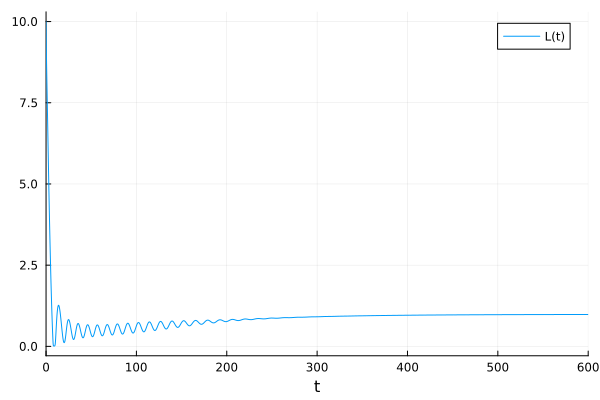

In [13]:
u0[1] = 10.0
u0[2] = 3.16228
u0[3] = 0.1
u0[4] = 3.16228
sol = solve(remake(prob, u0=u0,tspan=(0.0,600.0),p=p), Rodas4(),save_idxs=1,maxiters=30000,verbose=false, saveat=0.1)
plot(sol)

In [26]:
for i in 1:93
    if all(potentialPs[i, :] .== p)
        println(i)
    end
end


14


In [29]:
cd("/Users/ezragreenberg/Julia/ExperimentalFullModelWork/MaybeOscValuesAnalysis/MaybeOsc14/OscSolutions")
function entryToSol(df, row, p; tspan = shortSpan)
    currow = df[row,:]
    u0[1] = currow[:L]
    u0[2] = currow[:K]
    u0[3] = currow[:P]
    u0[4] = currow[:A] 
    return solve(remake(prob, u0=u0, tspan=(0.0, tspan), p=p), Rodas4(), abstol=1e-8, reltol=1e-12, saveat=0.1, save_idxs=1, maxiters=200 * tspan, verbose=false, callback=TerminateSteadyState(1e-8, 1e-12))
end
df = DataFrame(CSV.File("OscSolutions.csv"))

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0942892,31.8438,-600.0
2,0.398107,0.398107,2.51189,0.0158489,0.122547,25.1045,-600.0
3,0.398107,0.630957,2.51189,0.0251189,0.0394672,17.5323,-600.0
4,0.158489,0.251189,3.98107,0.00630957,0.0542271,29.9176,-600.0
5,0.251189,0.398107,3.98107,0.01,0.0822921,23.0957,-600.0
6,0.398107,0.630957,3.98107,0.0158489,0.0866973,18.0645,-600.0
7,0.630957,1.0,3.98107,0.0251189,0.0698871,14.2525,-600.0
8,0.630957,1.0,6.30957,0.0251189,0.0998682,15.127,-600.0
9,1.0,1.58489,6.30957,0.0398107,0.106109,11.7143,-600.0


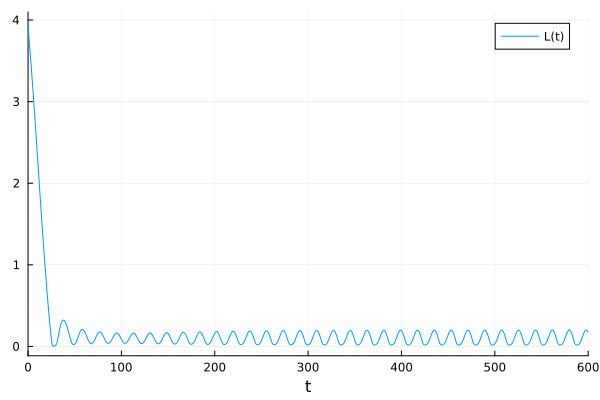

In [39]:
plot(entryToSol(df, 6, potentialPs[14, :]; tspan = 600))

In [47]:
cd("/Users/ezragreenberg/Julia/ExperimentalFullModelWork/MaybeOscValuesAnalysis/")
pwd()

"/Users/ezragreenberg/Julia/ExperimentalFullModelWork/MaybeOscValuesAnalysis"

In [49]:
for i in 1:93
    cd("MaybeOsc$i/OscSolutions")
    df = DataFrame(CSV.File("OscSolutions.csv"))
    for j in 1:size(df, 1)
        plt = plot(entryToSol(df, j, potentialPs[j, :]; tspan = 2000))
        savefig(plt, "$j.png")
    end
    cd("../..")
end

In [68]:
function entryToSol(df, row, p; tspan = shortSpan)
    currow = df[row,:]
    u0[1] = currow[:L]
    u0[2] = currow[:K]
    u0[3] = currow[:P]
    u0[4] = currow[:A] 
    return solve(remake(prob, u0=u0, tspan=(0.0, tspan), p=p), Rodas4(), abstol=1e-6, reltol=1e-8, saveat=0.1, save_idxs=1, maxiters=200 * tspan, verbose=false) 
end
cd("MaybeOsc6/OscSolutions")
df = DataFrame(CSV.File("OscSolutions.csv"))
for j in 1:size(df, 1)
        sol = (entryToSol(df, j, potentialPs[j, :]; tspan = 600))
        println(finalClassifier(sol, 600))
end
cd("../..")
df

[2.0, 0.0, 0.0]
[2.0, 0.0, 0.0]
[2.0, 0.0, 0.0]
[4.0, 0.0, 0.0]
[2.0, 0.0, 0.0]
[-600.0, 19.49655172413793, 0.316025520626366]


Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.398107,0.398107,3.98107,0.0158489,0.0987108,36.3733,-600.0
2,0.630957,0.630957,3.98107,0.0251189,0.103631,28.7789,-600.0
3,0.398107,0.398107,6.30957,0.01,0.120189,38.8077,-600.0
4,0.630957,0.630957,6.30957,0.0158489,0.131837,31.7941,-600.0
5,1.0,1.0,6.30957,0.0251189,0.106936,25.8,-600.0
6,2.51189,2.51189,10.0,0.0630957,0.316026,19.4966,-600.0


Dict{Any, Any}(

:P => [0.001, 0.001584893192461114, 0.0025118864315095794, 0.003981071705534973, 0.00630957344480193, 0.010000000000000002, 0.015848931924611134, 0.025118864315095794, 0.039810717055349734, 0.06309573444801933, 0.1, 0.15848931924611134, 0.251188643150958, 0.39810717055349726, 0.6309573444801932, 1.0, 1.5848931924611136, 2.51188643150958, 3.9810717055349722, 6.309573444801933, 10.0, 15.848931924611133, 25.118864315095795, 39.810717055349734, 63.09573444801933, 100.0], :A => [0.010000000000000002, 0.015848931924611134, 0.025118864315095794, 0.039810717055349734, 0.06309573444801933, 0.1, 0.15848931924611134, 0.251188643150958, 0.39810717055349726, 0.6309573444801932, 1.0, 1.5848931924611136, 2.51188643150958, 3.9810717055349722, 6.309573444801933, 10.0, 15.848931924611133, 25.118864315095795, 39.810717055349734, 63.09573444801933, 100.0], :K => [0.001, 0.001584893192461114, 0.0025118864315095794, 0.003981071705534973, 0.00630957344480193, 0.010000000000000002, 0.015848931924611134, 0.025

In [65]:
new_df6 = classifyConcentrations(potentialPs[6, :], u0Ranges; savedata = false)

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.01,0.001,0.01,0.001,0.0,0.0,2.0
2,0.0158489,0.001,0.01,0.001,0.0,0.0,2.0
3,0.0251189,0.001,0.01,0.001,0.0,0.0,2.0
4,0.0398107,0.001,0.01,0.001,0.0,0.0,2.0
5,0.0630957,0.001,0.01,0.001,0.0,0.0,2.0
6,0.1,0.001,0.01,0.001,0.0,0.0,2.0
7,0.158489,0.001,0.01,0.001,0.0,0.0,2.0
8,0.251189,0.001,0.01,0.001,0.0,0.0,2.0
9,0.398107,0.001,0.01,0.001,0.0,0.0,2.0


In [66]:
osc_6 = new_df6[new_df6[:, :retcode] .< 0, :]

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.398107,0.398107,3.98107,0.0158489,0.0987108,36.3733,-600.0
2,0.630957,0.630957,3.98107,0.0251189,0.103631,28.7789,-600.0
3,0.398107,0.398107,6.30957,0.01,0.120189,38.8077,-600.0
4,0.630957,0.630957,6.30957,0.0158489,0.131837,31.7941,-600.0
5,1.0,1.0,6.30957,0.0251189,0.106936,25.8,-600.0
6,2.51189,2.51189,10.0,0.0630957,0.316026,19.4966,-600.0


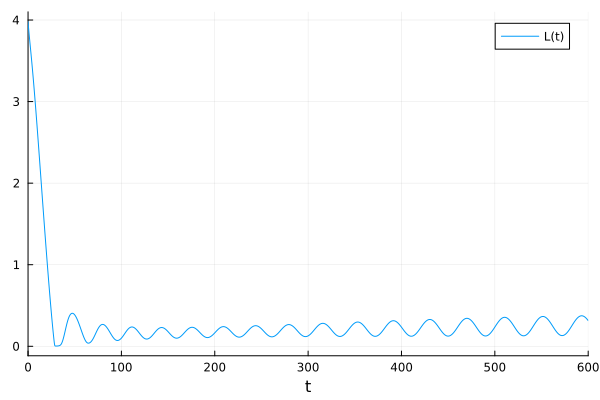

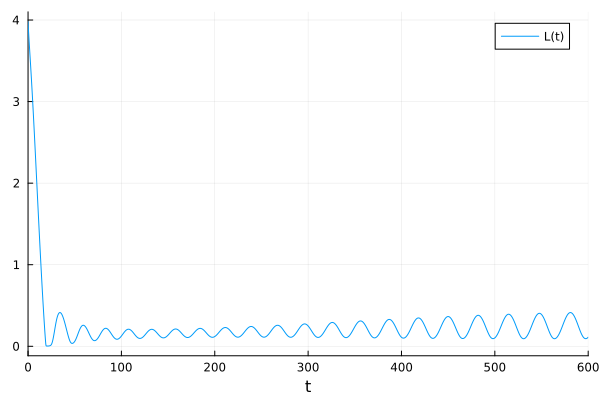

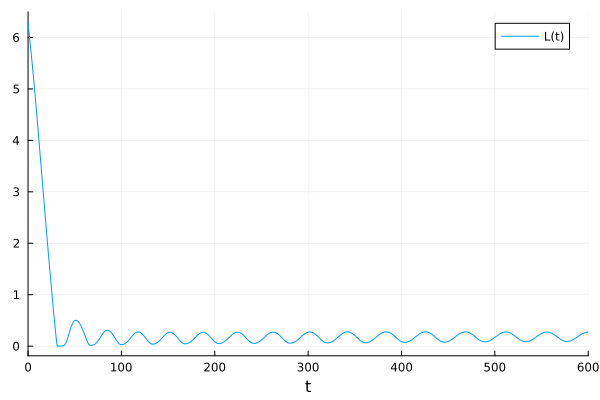

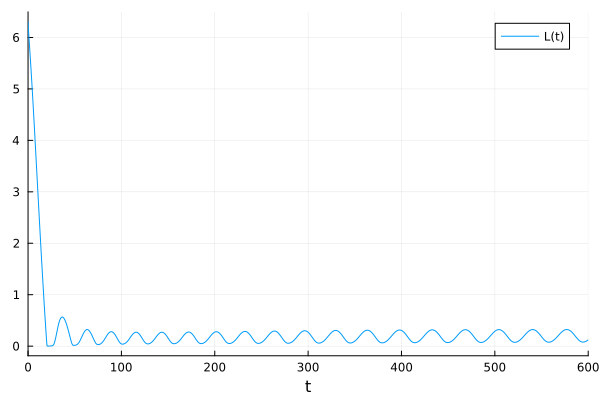

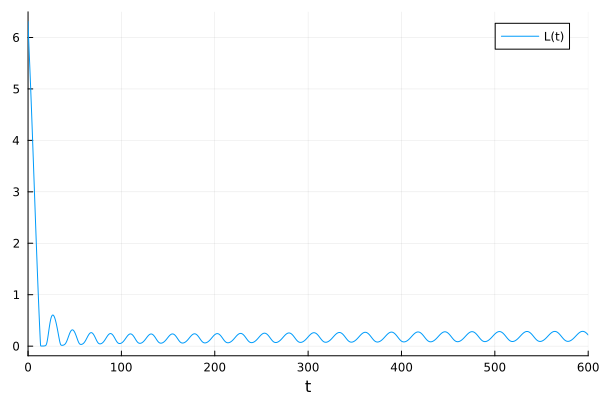

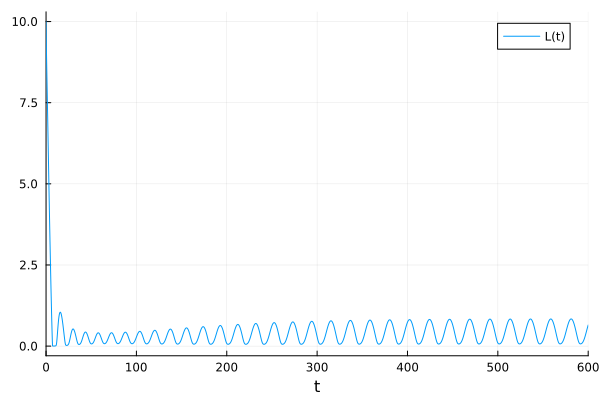

In [72]:
for j in 1:size(osc_6, 1)
        sol = (entryToSol(osc_6, j, potentialPs[6, :]; tspan = 600))
        plt = plot(sol)
        display(plt)
end

In [76]:
for i in 1:93
    cd("MaybeOsc$i/OscSolutions")
    df = DataFrame(CSV.File("OscSolutions.csv"))
    for j in 1:size(df, 1)
        sol = (entryToSol(df, j, potentialPs[i, :]; tspan = 600))
        savefig(plot(sol), "$j.png")
    end
    cd("../..")
end

In [75]:
cd("/Users/ezragreenberg/Julia/ExperimentalFullModelWork/MaybeOscValuesAnalysis")

Let's make a csv of every oscillatory combination.

In [84]:
mydf = DataFrame(Dict(:df => Float64[], :ka7 => Float64[],
    :ka4 => Float64[], :ka1 => Float64[], :kb1 => Float64[],
    :retcode => Float64[], :per => Float64[], :amp => Float64[],
    :L => Float64[], :K => Float64[], :P => Float64[], :A => Float64[]))
for i in 1:93
    curP = potentialPs[i,:]
    curY = curP[13]
    curka1 = curP[1]
    curkb1 = curP[2]
    curka7 = curP[10]
    curka4 = curP[8]
    cd("MaybeOsc$i/OscSolutions")
    curdf = DataFrame(CSV.File("OscSolutions.csv"))
    for j in 1:size(curdf, 1)
        curDict = Dict(:df => curY, :ka7 => curka7, :ka4 => curka4, :kb1 => curkb1, :ka1 => curka1,
        :L => curdf[j, :L], :K => curdf[j, :K], :A => curdf[j, :A], :P => curdf[j, :P],
        :retcode => curdf[j, :retcode], :per => curdf[j, :per], :amp=>curdf[j, :amp])
        push!(mydf, curDict)
    end
    cd("../..")
end
mydf



Row,A,K,L,P,amp,df,ka1,ka4,ka7,kb1,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.630957,0.630957,2.51189,0.00251189,0.218146,10000.0,0.01,0.001,6.30957,0.001,93.3,-600.0
2,0.630957,0.630957,2.51189,0.00398107,0.223155,10000.0,0.01,0.001,6.30957,0.001,100.55,-600.0
3,0.630957,1.0,2.51189,0.00630957,0.083443,10000.0,0.01,0.001,6.30957,0.001,74.1167,-600.0
4,1.0,1.0,2.51189,0.00630957,0.221265,10000.0,0.01,0.001,6.30957,0.001,73.9667,-600.0
5,0.630957,1.0,3.98107,0.00398107,0.259762,10000.0,0.01,0.001,6.30957,0.001,77.86,-600.0
6,1.0,1.0,3.98107,0.00398107,0.528168,10000.0,0.01,0.001,6.30957,0.001,86.1,-600.0
7,1.0,1.58489,3.98107,0.00630957,0.230794,10000.0,0.01,0.001,6.30957,0.001,59.225,-600.0
8,1.58489,1.58489,3.98107,0.01,0.38148,10000.0,0.01,0.001,6.30957,0.001,64.3429,-600.0
9,0.630957,1.0,6.30957,0.00251189,0.273121,10000.0,0.01,0.001,6.30957,0.001,77.22,-600.0


In [83]:
cd("../..")

In [85]:
pwd()

"/Users/ezragreenberg/Julia/ExperimentalFullModelWork/MaybeOscValuesAnalysis"

In [86]:
CSV.write("AllExpOsc.csv",mydf)

"AllExpOsc.csv"

In [87]:
describe(mydf)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,A,0.880216,0.158489,0.630957,10.0,0,Float64
2,K,1.2251,0.158489,1.0,10.0,0,Float64
3,L,5.21464,1.58489,3.98107,25.1189,0,Float64
4,P,0.0292235,0.00251189,0.0158489,0.251189,0,Float64
5,amp,0.158244,0.0119112,0.106461,0.9713,0,Float64
6,df,10000.0,10000.0,10000.0,10000.0,0,Float64
7,ka1,0.0839805,0.01,0.1,0.316228,0,Float64
8,ka4,0.00488061,0.001,0.00316228,0.01,0,Float64
9,ka7,5.64231,2.51189,3.98107,10.0,0,Float64
